In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings( "ignore" )

In [42]:
#reading the data set named as train

data=pd.read_csv("healthcare-dataset-stroke-data.csv",header=0)

In [43]:
# Checking the shape of the data
data.shape

(5110, 12)

In [44]:
# Reading random Rows of the data

data.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2002,15418,Female,80.0,0,0,Yes,Self-employed,Rural,90.43,34.2,never smoked,0


In [45]:
 # checking the information of the dataset
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
#for the description 
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [47]:
data.drop(['ever_married','work_type','work_type'],axis=1,inplace=True)

In [48]:
data.sample()

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3893,41554,Female,50.0,0,0,Rural,65.25,25.4,smokes,0


In [49]:
# Separating the output from the dataset

df = data.loc[:,data.columns!="stroke"]


In [50]:
# Creating output column

y = data["stroke"]


In [51]:
#total number of missing value in a table of each column

df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

<AxesSubplot:>

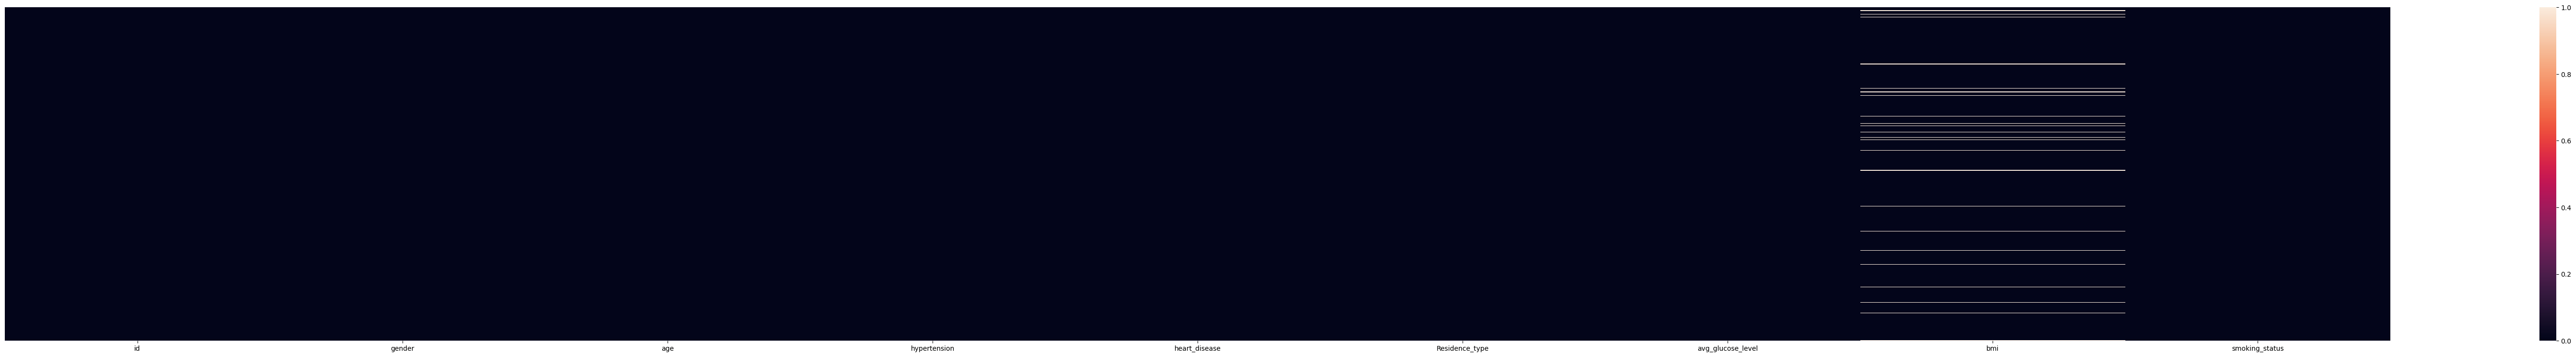

In [52]:
# Plotting a heat map to check null values in each column
plt.figure(figsize=(80,9))
sns.heatmap(df.isnull(),yticklabels= False)

In [53]:
# printing total number of duplicate values
df.duplicated().sum()

0

In [54]:
#finding the datatype of each feature

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [55]:
# Excluding/separating a categorical column from numerical columns

df1=df.select_dtypes(exclude=['object'])

In [56]:
# separating numerical columns from categorical

df2=df.select_dtypes(exclude=['float64','int64'])

In [57]:
df1.shape

(5110, 6)

In [58]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0,1,228.69,36.6
1,51676,61.0,0,0,202.21,NaN
2,31112,80.0,0,1,105.92,32.5
3,60182,49.0,0,0,171.23,34.4
4,1665,79.0,1,0,174.12,24.0


In [59]:
# Define the is_outlier function
def is_outlier(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"x={x}, Q1={Q1}, Q3={Q3}, IQR={IQR}, lower_bound={lower_bound}, upper_bound={upper_bound}")
    return (x < lower_bound) | (x > upper_bound)


In [60]:
# Apply the is_outlier function to each column in the dataset
outliers = df1.apply(is_outlier)


x=0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64, Q1=17741.25, Q3=54682.0, IQR=36940.75, lower_bound=-37669.875, upper_bound=110093.125
x=0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64, Q1=25.0, Q3=61.0, IQR=36.0, lower_bound=-29.0, upper_bound=115.0
x=0       0
1       0
2       0
3       0
4       1
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: hypertension, Length: 5110, dtype: int64, Q1=0.0, Q3=0.0, IQR=0.0, lower_bound=0.0, upper_bound=0.0
x=0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int64, Q1=0.0, Q3=0.0, IQR=0.0, lower_bound=0.0, upper_bound=0.0
x=0       228.69
1       202.21


In [61]:
# Print the number of outliers in each column
print(outliers.sum())

id                     0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
dtype: int64


In [62]:
# outlier treatment

def cap_data(df1):
    for col in df1.columns:
        print("capping the",col)
        if (((df1[col].dtype)=='float64')|((df1[col].dtype)=='int64')):
            percentiles = df1[col].quantile([0.25,0.75]).values
            df1[col][df1[col] <= percentiles[0]] = percentiles[0]
            df1[col][df1[col] >= percentiles[1]] = percentiles[1]
        else:
            df1[col]=df1[col]
    return df1
final_df1 = cap_data(df1)


#UCL=Q3 + 1.5 * IQR

capping the id
capping the age
capping the hypertension
capping the heart_disease
capping the avg_glucose_level
capping the bmi


C:\Users\Sahana s\AppData\Local\Temp\ipykernel_20176\1511544598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df1[col] <= percentiles[0]] = percentiles[0]
C:\Users\Sahana s\AppData\Local\Temp\ipykernel_20176\1511544598.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][df1[col] >= percentiles[1]] = percentiles[1]


In [63]:
# Apply the is_outlier function to each column in the dataset
outliers = df1.apply(is_outlier)

x=0       17741.25
1       51676.00
2       31112.00
3       54682.00
4       17741.25
          ...   
5105    18234.00
5106    44873.00
5107    19723.00
5108    37544.00
5109    44679.00
Name: id, Length: 5110, dtype: float64, Q1=17742.1875, Q3=54672.25, IQR=36930.0625, lower_bound=-37652.90625, upper_bound=110067.34375
x=0       61.0
1       61.0
2       61.0
3       49.0
4       61.0
        ... 
5105    61.0
5106    61.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64, Q1=25.0, Q3=61.0, IQR=36.0, lower_bound=-29.0, upper_bound=115.0
x=0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: hypertension, Length: 5110, dtype: int64, Q1=0.0, Q3=0.0, IQR=0.0, lower_bound=0.0, upper_bound=0.0
x=0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int64, Q1=0.0, Q3=0.0, IQR=0.0, lower_bound=0.0, uppe

In [64]:
# Print the number of outliers in each column
print(outliers.sum())

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64


In [65]:
# missing value treatment using median
median_bmi = df1['bmi'].median()
df1['bmi'] = df1['bmi'].fillna(median_bmi)

In [66]:
df1.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [67]:
# concatinating numerical and catrgorical columns 
data_frame=pd.concat([df1,df2],axis=1)

In [68]:
data_frame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,Residence_type,smoking_status
0,17741.25,61.0,0,0,114.09,33.1,Male,Urban,formerly smoked
1,51676.00,61.0,0,0,114.09,28.1,Female,Rural,never smoked
2,31112.00,61.0,0,0,105.92,32.5,Male,Rural,never smoked
3,54682.00,49.0,0,0,114.09,33.1,Female,Urban,smokes
4,17741.25,61.0,0,0,114.09,24.0,Female,Rural,never smoked
...,...,...,...,...,...,...,...,...,...
5105,18234.00,61.0,0,0,83.75,28.1,Female,Urban,never smoked
5106,44873.00,61.0,0,0,114.09,33.1,Female,Urban,never smoked
5107,19723.00,35.0,0,0,82.99,30.6,Female,Rural,never smoked
5108,37544.00,51.0,0,0,114.09,25.6,Male,Rural,formerly smoked


In [69]:
data_frame.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
gender               0
Residence_type       0
smoking_status       0
dtype: int64

In [70]:
data_set = pd.DataFrame(data_frame)

# Apply one-hot encoding to the 'Gender' column
data_set = pd.get_dummies(data_frame, columns=['gender','Residence_type','smoking_status'],drop_first = True)

# Print the encoded dataset
data_set


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17741.25,61.0,0,0,114.09,33.1,1,0,1,1,0,0
1,51676.00,61.0,0,0,114.09,28.1,0,0,0,0,1,0
2,31112.00,61.0,0,0,105.92,32.5,1,0,0,0,1,0
3,54682.00,49.0,0,0,114.09,33.1,0,0,1,0,0,1
4,17741.25,61.0,0,0,114.09,24.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.00,61.0,0,0,83.75,28.1,0,0,1,0,1,0
5106,44873.00,61.0,0,0,114.09,33.1,0,0,1,0,1,0
5107,19723.00,35.0,0,0,82.99,30.6,0,0,0,0,1,0
5108,37544.00,51.0,0,0,114.09,25.6,1,0,0,1,0,0


In [71]:
data_set.shape

(5110, 12)